<a href="https://colab.research.google.com/github/Krishnadayal/Data-Science-Project-Lifecycle/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

In [3]:
train_data = pd.read_csv("/content/train_data")
train_data.head()

,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_category
0,Kelaniya,1209.60,756.00,5292.00,4
1,Moratuwa,1590.12,1060.08,6007.12,1
2,Wattala,2288.88,1481.04,9155.52,4
3,Wattala,2274.94,1739.66,9099.76,4
4,Kelaniya,2345.49,2069.55,9243.99,4


In [4]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [5]:
train_data["outlet_city"] = train_data["outlet_city"].astype("category")

In [6]:
train_data.dtypes

,0
outlet_city,category
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_category,int64


In [7]:
mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5}
train_data["cluster_category"] = train_data["cluster_category"].map(mapping)

In [8]:
x = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [9]:
print(x)

       outlet_city  luxury_sales  fresh_sales  dry_sales
0         Kelaniya       1209.60       756.00    5292.00
1         Moratuwa       1590.12      1060.08    6007.12
2          Wattala       2288.88      1481.04    9155.52
3          Wattala       2274.94      1739.66    9099.76
4         Kelaniya       2345.49      2069.55    9243.99
...            ...           ...          ...        ...
774142     Gampaha       3893.40      3893.40    3448.44
774143  Katunayake       6095.86      5557.99    6275.15
774144     Colombo       5121.42      4820.16    4669.53
774145       Kandy       6311.76      6311.76    5940.48
774146     Negombo       5833.50      6027.95    6611.30

[774147 rows x 4 columns]


In [10]:
print(y)

0         3
1         0
2         3
3         3
4         3
         ..
774142    2
774143    2
774144    2
774145    2
774146    2
Name: cluster_category, Length: 774147, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [12]:
print(x_train)

         outlet_city  luxury_sales  fresh_sales  dry_sales
89392       Homagama       1328.16       996.12    5561.67
585858      Kalmunai       3021.38     10972.38    2067.26
200465  Nuwara Eliya        902.40      5188.80    1428.80
70065     Peliyagoda       1987.47      1286.01    8183.70
773140       Negombo       5587.56      5756.88    5248.92
...              ...           ...          ...        ...
259178      Kelaniya       1510.44      8810.90    2517.40
365838      Moratuwa       5132.05      4985.42    4545.53
131932  Nuwara Eliya       1979.04      1458.24    6874.56
671155       Colombo       1954.50      8860.40    1303.00
121958      Panadura       1075.80       591.69    3657.72

[580610 rows x 4 columns]


In [13]:
print(x_test)

                   outlet_city  luxury_sales  fresh_sales  dry_sales
187811                 Wattala       1334.00      9204.60    2401.20
415558                   Kandy        673.53      1040.91    4163.64
536530                   Galle       1564.75      2276.00    9246.25
78769               Peliyagoda       1871.28      1559.40    6861.36
318706  Dehiwala-Mount Lavinia        878.68      5272.08    1517.72
...                        ...           ...          ...        ...
82635               Peliyagoda       1987.65      1325.10    8613.15
475123              Batticaloa        741.29      1213.02    4380.35
106366              Peliyagoda        877.71       722.82    3355.95
616655             Trincomalee       2199.42      8186.73    1588.47
743829              Batticaloa       5134.34      4832.32    4530.30

[193537 rows x 4 columns]


In [14]:
print(y_train)

89392     3
585858    5
200465    1
70065     3
773140    2
         ..
259178    1
365838    4
131932    3
671155    5
121958    3
Name: cluster_category, Length: 580610, dtype: int64


In [15]:
print(y_test)

187811    1
415558    0
536530    0
78769     3
318706    1
         ..
82635     3
475123    0
106366    3
616655    5
743829    2
Name: cluster_category, Length: 193537, dtype: int64


In [16]:
from xgboost import XGBClassifier
classifier = XGBClassifier(enable_categorical = True, max_depth = 5, learning_rate = 0.03,
                           n_estimators = 200, reg_alpha = 1, reg_lambda = 1, subsample = 0.7,
                           colsample_bytree = 0.7)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:
y_pred = classifier.predict(x_test)
comparision = pd.DataFrame({"Actual Cluster Category":y_test, "Predicted Cluster Category": y_pred})
comparision.head(10)

,Actual Cluster Category,Predicted Cluster Category
187811,1,1
415558,0,0
536530,0,0
78769,3,3
318706,1,1
679332,5,5
466887,0,0
505135,0,0
287606,1,1
599478,5,5


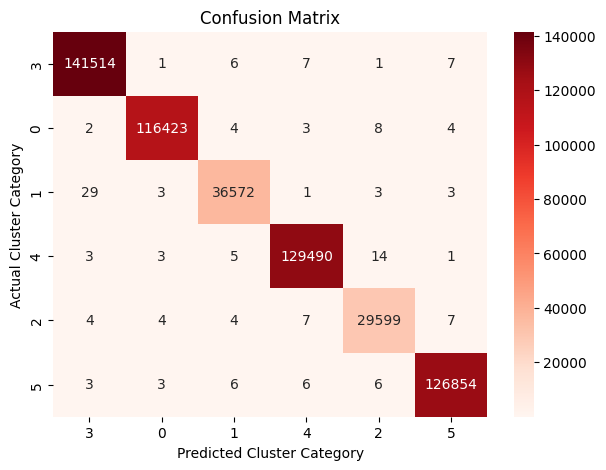

XGBoost Train Model Accuracy: 0.9997278724100515


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
x_pred = classifier.predict(x_train)

cm_train = confusion_matrix(y_train, x_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_train, annot = True, fmt = "d", cmap = "Reds", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"XGBoost Train Model Accuracy: {accuracy_score(y_train, x_pred)}")

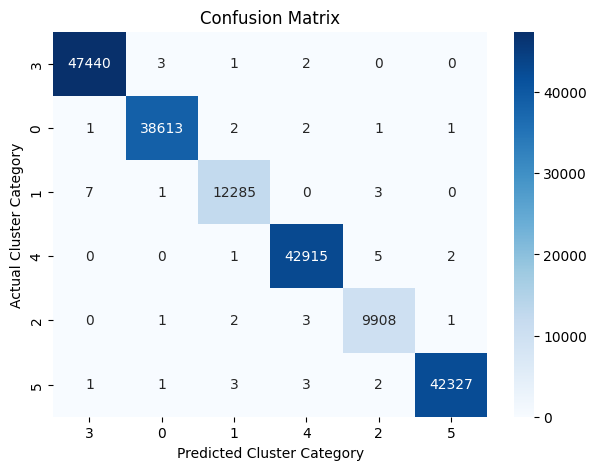

XGBoost Test Model Accuracy: 0.9997468184378181


In [19]:
cm_test = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_category"].unique()

plt.figure(figsize = (7,5))
sns.heatmap(cm_test, annot = True, fmt = "d", cmap = "Blues", xticklabels = labels, yticklabels = labels)
plt.xlabel("Predicted Cluster Category")
plt.ylabel("Actual Cluster Category")
plt.title("Confusion Matrix")
plt.show()

print(f"XGBoost Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.97%
Standard Deviation: 0.01%
Total Error: 0.03%


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47446
           1       1.00      1.00      1.00     38620
           2       1.00      1.00      1.00     12296
           3       1.00      1.00      1.00     42923
           4       1.00      1.00      1.00      9915
           5       1.00      1.00      1.00     42337

    accuracy                           1.00    193537
   macro avg       1.00      1.00      1.00    193537
weighted avg       1.00      1.00      1.00    193537



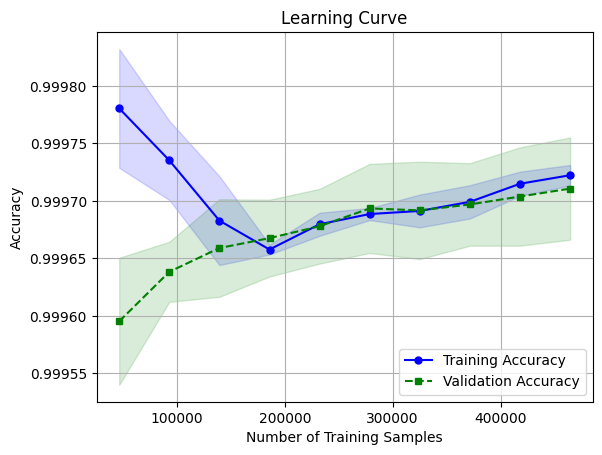

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=classifier,
                                                        X = x_train, y = y_train, cv = 5,
                                                        scoring = 'accuracy',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize = 5, label = 'Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc = 'lower right')
plt.show()

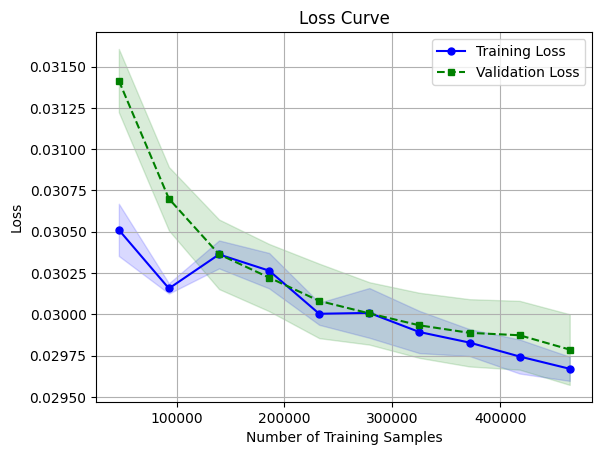

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = x_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()